<a href="https://colab.research.google.com/github/motorio0829/DL-for-AI/blob/main/chapter04_getting_started_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
train_data.shape

(25000,)

In [3]:
train_labels[0]

np.int64(1)

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
# 숫자를 다시 글자로 디코딩
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
# 첫 인덱스 0,1,2는 특수 토큰에 사용되므로 i-3, 딕셔너리에 없는 경우 ? 반

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # 단어가 존재하면 0을 1로 바꿈
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train.shape

(25000, 10000)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [38]:
model2 = keras.Sequential([
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

In [39]:
model2.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [40]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.5578 - loss: 0.8672 - val_accuracy: 0.7003 - val_loss: 0.6180
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.7405 - loss: 0.5377 - val_accuracy: 0.8290 - val_loss: 0.4806
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.8508 - loss: 0.3527 - val_accuracy: 0.8465 - val_loss: 0.3611
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.8967 - loss: 0.2593 - val_accuracy: 0.8672 - val_loss: 0.3124
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.9236 - loss: 0.2008 - val_accuracy: 0.8738 - val_loss: 0.3038
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9501 - loss: 0.1417 - val_accuracy: 0.8216 - val_loss: 0.4704
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9654 - loss: 0.1013 - val_accuracy: 0.8408 - val_loss: 0.4830
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - accuracy: 0.9687 - loss: 0.0873 - val_accurac

**Compiling the model**

In [17]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.7035 - loss: 0.5977 - val_accuracy: 0.8639 - val_loss: 0.4075
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8962 - loss: 0.3470 - val_accuracy: 0.8850 - val_loss: 0.3182
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9223 - loss: 0.2544 - val_accuracy: 0.8886 - val_loss: 0.2869
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9327 - loss: 0.2069 - val_accuracy: 0.8851 - val_loss: 0.2842
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9472 - loss: 0.1691 - val_accuracy: 0.8873 - val_loss: 0.2755
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9574 - loss: 0.1411 - val_accuracy: 0.8889 - val_loss: 0.2789
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9619 - loss: 0.1236 - val_accuracy: 0.8839 - val_loss: 0.3028
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9714 - loss: 0.1068 - val_accuracy: 0.8836 - v

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

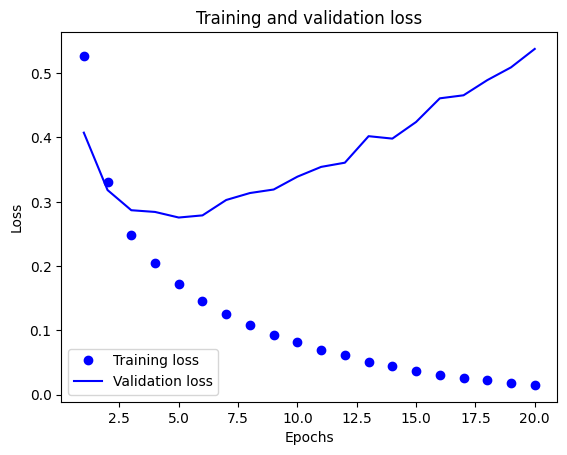

In [42]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

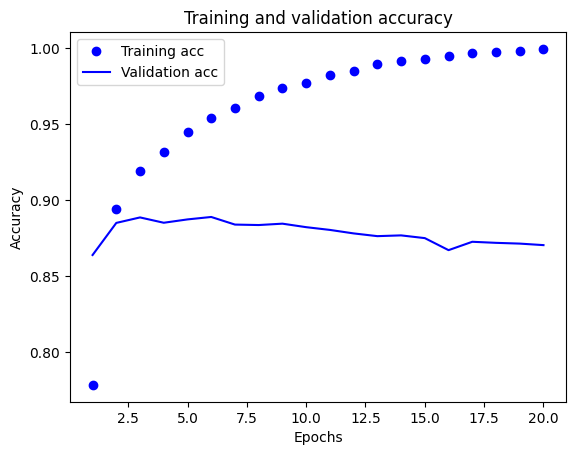

In [43]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [44]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7324 - loss: 0.5675
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9006 - loss: 0.2897
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9238 - loss: 0.2174
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9395 - loss: 0.1788
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8832 - loss: 0.2914


In [45]:
results

[0.28868621587753296, 0.8855999708175659]

### Using a trained model to generate predictions on new data

In [46]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([[0.2109296 ],
       [0.9996571 ],
       [0.88253814],
       ...,
       [0.13130765],
       [0.11679807],
       [0.70681316]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [47]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [48]:
len(train_data)

8982

In [49]:
len(test_data)

2246

In [50]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [51]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [52]:
train_labels[10]

np.int64(3)

### Preparing the data

**Encoding the input data**

In [53]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [54]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [55]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [57]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
# softmax: sigmoid의 확장, 다중분류 확률 출력
])

**Compiling the model**

In [58]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [59]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [60]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.3394 - loss: 3.2225 - val_accuracy: 0.6170 - val_loss: 1.8474
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.6707 - loss: 1.6564 - val_accuracy: 0.7060 - val_loss: 1.3684
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7410 - loss: 1.2174 - val_accuracy: 0.7450 - val_loss: 1.1741
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7879 - loss: 0.9762 - val_accuracy: 0.7520 - val_loss: 1.0725
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8247 - loss: 0.8140 - val_accuracy: 0.7770 - val_loss: 0.9946
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8546 - loss: 0.6749 - val_accuracy: 0.7940 - val_loss: 0.9447
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8841 - loss: 0.5497 - val_accuracy: 0.8040 - val_loss: 0.9023
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9020 - loss: 0.4716 - val_accuracy: 0.7980 - v

**Plotting the training and validation loss**

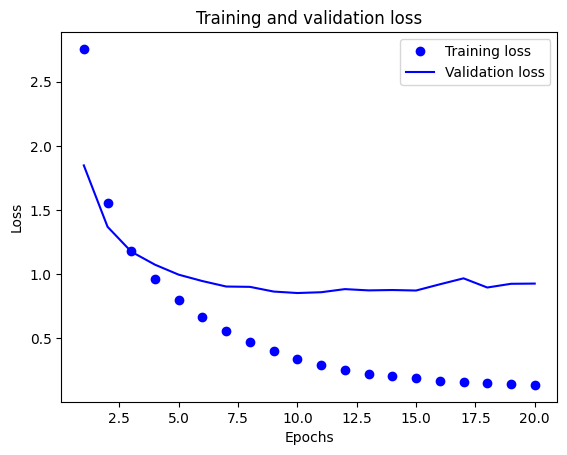

In [61]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

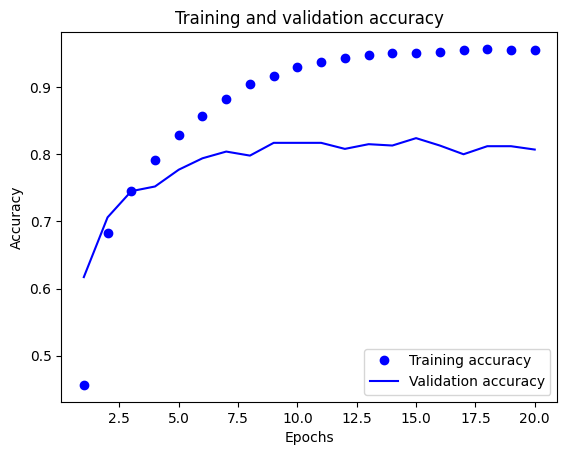

In [62]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [63]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.3072 - loss: 3.2399
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.6562 - loss: 1.6262
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7450 - loss: 1.2147
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7988 - loss: 0.9663
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8320 - loss: 0.7881
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8617 - loss: 0.6548
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8904 - loss: 0.5419
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9042 - loss: 0.4628
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9222 - loss: 0.3776
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8009 - loss: 0.8807


In [64]:
results

[0.9047592878341675, 0.7925200462341309]

In [70]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.20347284060552093)

### Generating predictions on new data

In [83]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [84]:
predictions[0].shape

(46,)

In [85]:
print(np.sum(predictions[0])) # 각 확률의 총합 = 1

0.9999998


In [86]:
print(np.argmax(predictions[0])) # 가장 높은 확률을 가지는 인덱스를 출력함

3


### A different way to handle the labels and the loss

In [87]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [88]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [89]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3307 - loss: 3.2131 - val_accuracy: 0.5080 - val_loss: 1.9982
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6213 - loss: 1.7854 - val_accuracy: 0.6700 - val_loss: 1.5381
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7036 - loss: 1.3324 - val_accuracy: 0.6840 - val_loss: 1.4353
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7089 - loss: 1.2026 - val_accuracy: 0.6760 - val_loss: 1.3642
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7188 - loss: 1.1118 - val_accuracy: 0.6790 - val_loss: 1.3601
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7344 - loss: 0.9873 - val_accuracy: 0.6840 - val_loss: 1.3290
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7362 - loss: 0.9555 - val_accuracy: 0.6830 - val_loss: 1.3042
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7506 - loss: 0.8889 - val_accuracy: 0.6880 - v

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary